# Exploratory Data Analysis 

Presented by - Avinash

Category - Renewals

Designation - Quality Analyst




Quality Analysis Report - September 2022 MTD

Team Muskaan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_excel(r'Team Muskaan.xlsx', engine='openpyxl')

In [3]:
df=pd.DataFrame(ds)
df.head()

,Timestamp,Audit Date,Email Address,Audit ID,Name of the BDE,BDE's Email ID,Learner's Email ID,Transaction ID (If PSA lead),Line of Business,Call Start Date,...,Slab,Fail Call Feedback Status,Ra/ZT Action,Defective,Month,Week,Date Error,PSA/ Non-PSA,Time,Hourly Slab
0,2022-09-02 10:57:18,2022-09-02,avinash.carneiro@unacademy.com,SEPT22AC0001,Monika mangal,monika.mangal@unacademy.com,basundharabismayee901@gmail.com,Z0BCFY2TSBFFJM93,Renewals,2022-03-24,...,91-100%,NaN,NaN,NaN,September,WK-1,-1,PSA,10:57:18,10AM-11AM
1,2022-09-02 12:57:05,2022-09-02,avinash.carneiro@unacademy.com,SEPT22AC0002,Mohd Abdullah,mohd.abdullah1@unacademy.com,abhishekghadge733@gmail.com,NaN,Renewals,2022-06-16,...,91-100%,NaN,NaN,Defective,September,WK-1,-1,Non PSA,12:57:05,12PM-1PM
2,2022-09-02 13:51:08,2022-09-02,avinash.carneiro@unacademy.com,SEPT22AC0003,Mohd. Amir,mohd.amir@unacademy.com,tiwarisrishti698@gmail.com,NaN,Renewals,2022-06-29,...,91-100%,NaN,NaN,NaN,September,WK-1,-3,Non PSA,13:51:08,1PM-2PM
3,2022-09-02 15:21:44,2022-09-02,avinash.carneiro@unacademy.com,SEPT22AC0004,Shubhangi,shubhangi.shubhi@unacademy.com,subhashdamor1913@gmail.com,NaN,Renewals,2022-08-30,...,91-100%,NaN,NaN,Defective,September,WK-1,-3,Non PSA,15:21:44,3PM-4PM
4,2022-09-02 15:50:28,2022-09-02,avinash.carneiro@unacademy.com,SEPT22AC0005,Molik N Rawal,molik.rawal@unacademy.com,ajayverma9414@gmail.com,NaN,Renewals,2022-07-15,...,91-100%,NaN,NaN,Defective,September,WK-1,0,Non PSA,15:50:28,3PM-4PM


In [4]:
# Replace all Nan values to empty string
df = df.replace(np.nan, 'Not Applicable', regex=True)

In [5]:
df = df.replace(to_replace ="None", value ="Not Applicable")

In [6]:
#changing the column name

df.rename(columns={'Sales Pitch-Explain Iconic Features and Benefits': 'Iconic Pitch'}, inplace=True)
df.rename(columns={'Sales Pitch-Explain Plus Features and Benefit\t': 'Plus Features Pitch'}, inplace=True)
df.rename(columns={'Educator credibility:-Learner liking the most, other top educators, along with educator': 'Educator Credibility'}, inplace=True)
df.rename(columns={'Sales Pitch- Did the BDE pitch new launches/new educator or any promotional offers': 'New Promotional Offers'}, inplace=True)
df.rename(columns={'Sales Pitch- Website / App navigation': 'Website Navigation'}, inplace=True)
df.rename(columns={'Sales Pitch- Explain subscription\t': 'Subscription Details'}, inplace=True)
df.rename(columns={'Sales Pitch- Did the BDE ask if learner has Educator code and then pitch for other discount/referral.': 'Educator/Referral/Renewal Code Pitch'}, inplace=True)
df.rename(columns={'Documentation- Documentation - Captured required notes in LS': 'Documentation - Captured Notes in LS'}, inplace=True)
df.rename(columns={'Documentation- Documentation - Send relevant Email as per templates': 'Documentation - Email Templates'}, inplace=True)
df.rename(columns={'Documentation-Documentation - Follow up - Created/completed ': 'Documentation - Follow Up Call Created/Completed'}, inplace=True)
df.rename(columns={'Documentation - Correct lead stage selected as per call scenario': 'Documentation - Correct Lead Stage Selection'}, inplace=True)
df.rename(columns={'Was referral Pitched?': 'Referral Pitch'}, inplace=True)
df.rename(columns={'How effectively the learner referral was pitched?': 'Referral Pitch Effectiveness'}, inplace=True)
df.rename(columns={'Did BDE pitch success story of UPSC Rankers? (177+ UPSC 2021 rankers have used Unacademy platform out of a total of 685 rankers)': 'UPSC 2021 Rankers Pitch'}, inplace=True)


In [ ]:
df.columns

In [ ]:
#Printing the object datatypes and their unique values

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('************************************************************************')
        print('\n')

In [ ]:
df['Score'] = df['Score'].str.replace('%','').astype(float)

In [ ]:
df['Week'] = df['Week'].str.replace('Week','').astype(float)

# Team Adherence Report

Text(0.5, 1.0, 'Documentation - Lead Disposition Adherence')

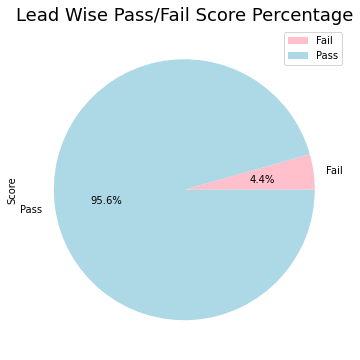

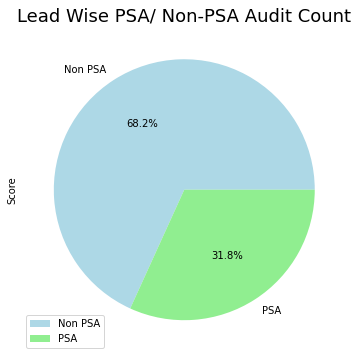

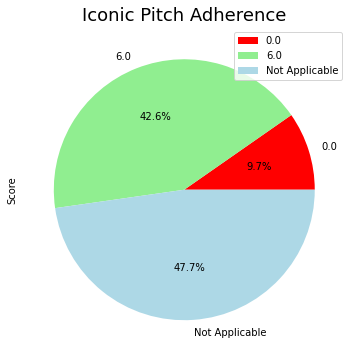

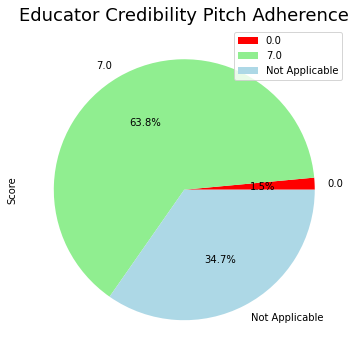

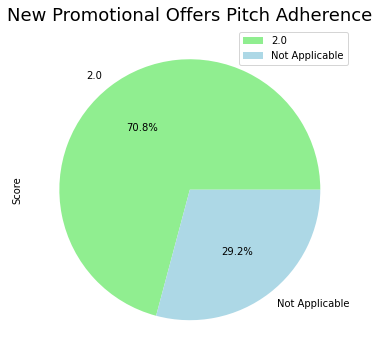

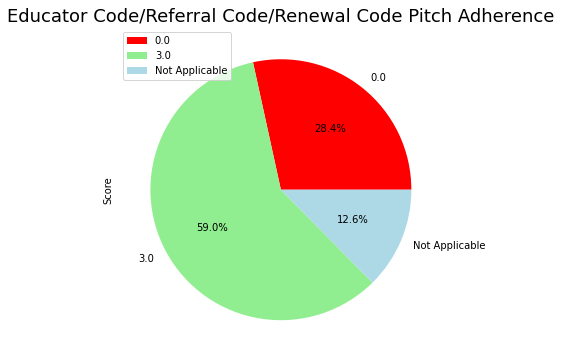

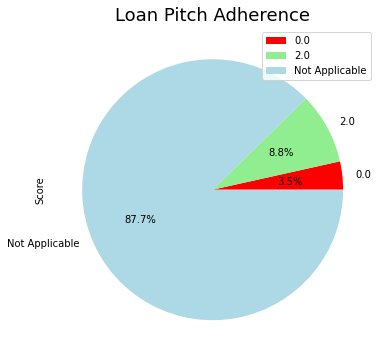

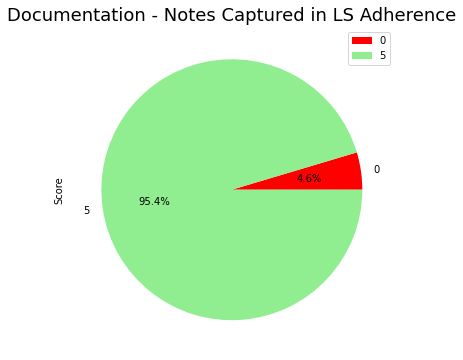

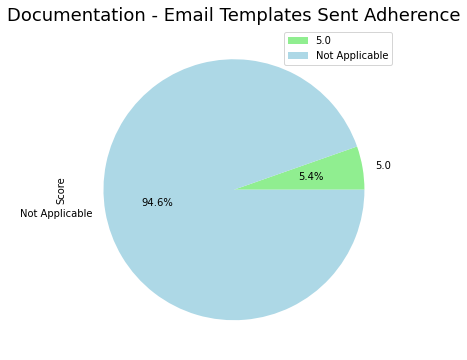

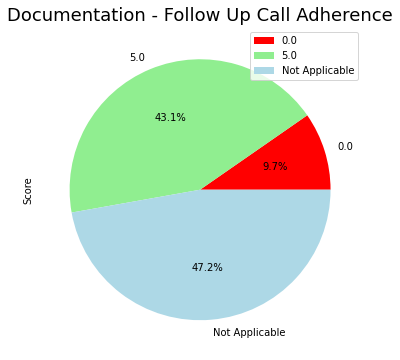

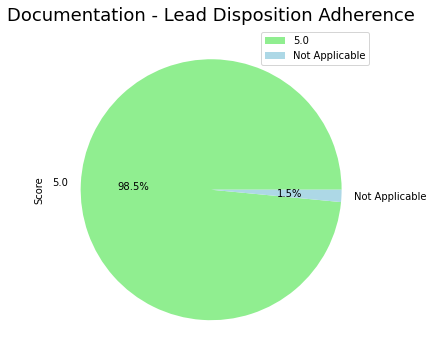

In [63]:
#Parameter Adherence
my_colors = ['pink', 'lightblue']
df.groupby(['Pass/Fail']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Lead Wise Pass/Fail Score Percentage', fontsize=18)

my_colors = ['lightblue', 'lightgreen']
df.groupby(['PSA/ Non-PSA']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Lead Wise PSA/ Non-PSA Audit Count', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Iconic Pitch']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Iconic Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Educator Credibility']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Educator Credibility Pitch Adherence', fontsize=18)

my_colors = ['lightgreen', 'lightblue']
df.groupby(['New Promotional Offers']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('New Promotional Offers Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Educator/Referral/Renewal Code Pitch']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Educator Code/Referral Code/Renewal Code Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Sales Pitch- Loan']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Loan Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Captured Notes in LS']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Notes Captured in LS Adherence', fontsize=18)

my_colors = ['lightgreen', 'lightblue']
df.groupby(['Documentation - Email Templates']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Email Templates Sent Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Follow Up Call Created/Completed']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Follow Up Call Adherence', fontsize=18)

my_colors = ['lightgreen', 'lightblue']
df.groupby(['Documentation - Correct Lead Stage Selection']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Lead Disposition Adherence', fontsize=18)


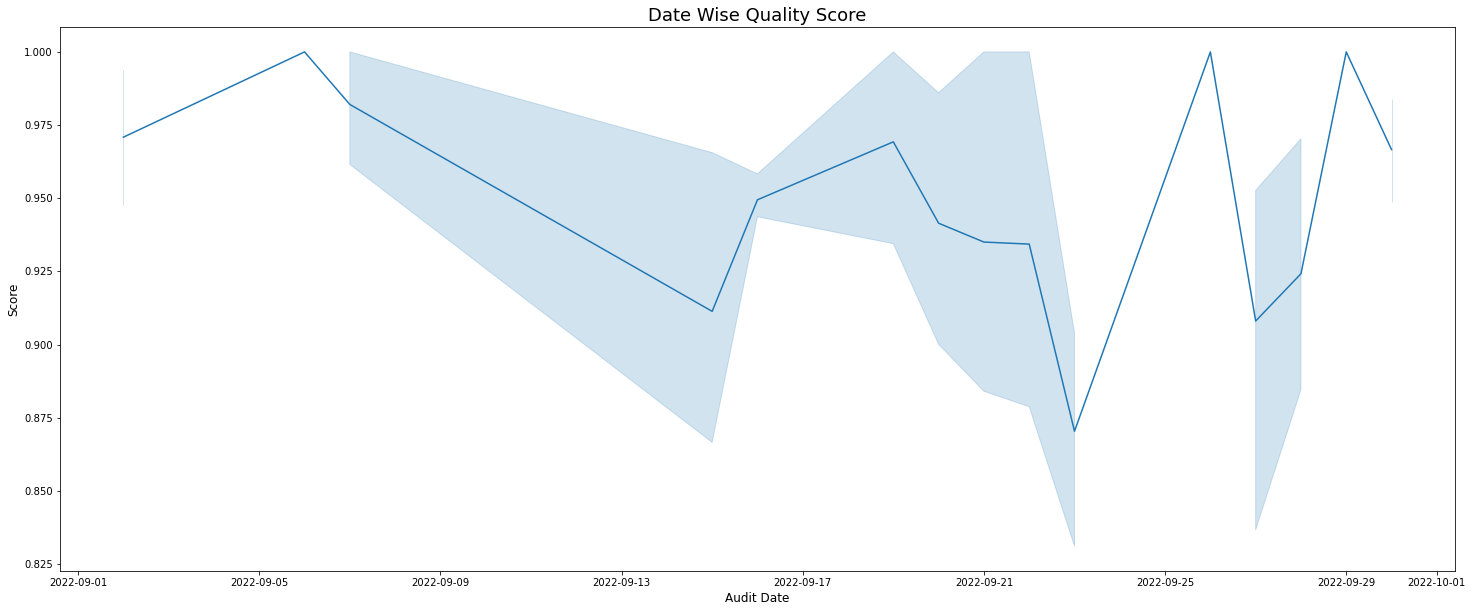

In [9]:
#Date Wise Quality Score
plt.figure(figsize=(25, 10))
sns.lineplot(x="Audit Date", y="Score", data=df)
df.set_index("Audit Date", inplace=True)
plt.title('Date Wise Quality Score', fontsize=18)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Audit Date', fontsize=12)
plt.xticks(rotation=0)
plt.show()

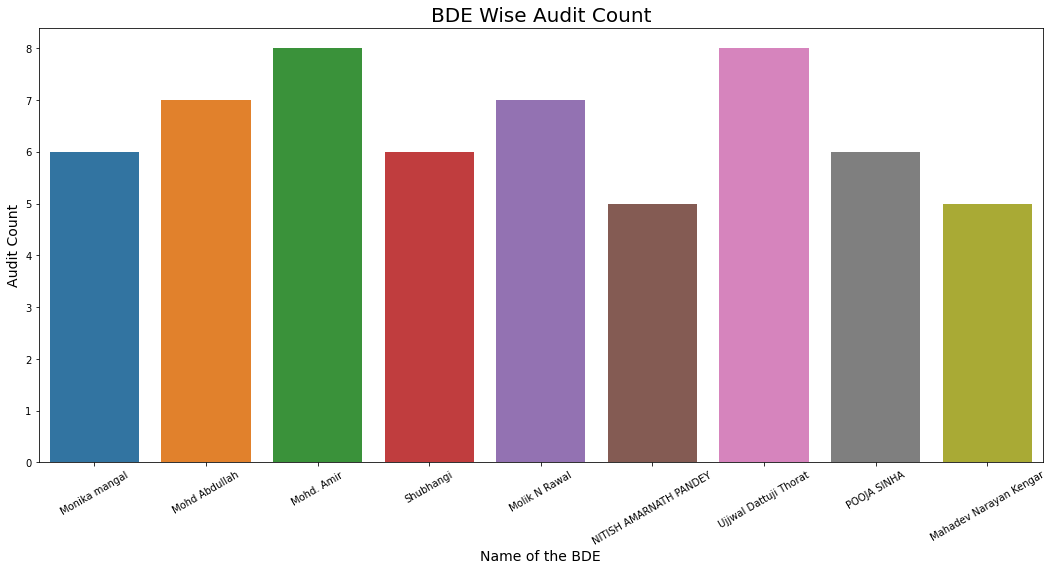

Mohd. Amir                8
Ujjwal Dattuji Thorat     8
Mohd Abdullah             7
Molik N Rawal             7
Monika mangal             6
Shubhangi                 6
POOJA SINHA               6
NITISH AMARNATH PANDEY    5
Mahadev Narayan Kengar    5
Name: Name of the BDE, dtype: int64


In [10]:
#BDE Wise Audit Count
plt.figure(figsize=(18, 8))
sns.countplot(df['Name of the BDE'])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Audit Count', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
plt.show()


print(df['Name of the BDE'].value_counts())

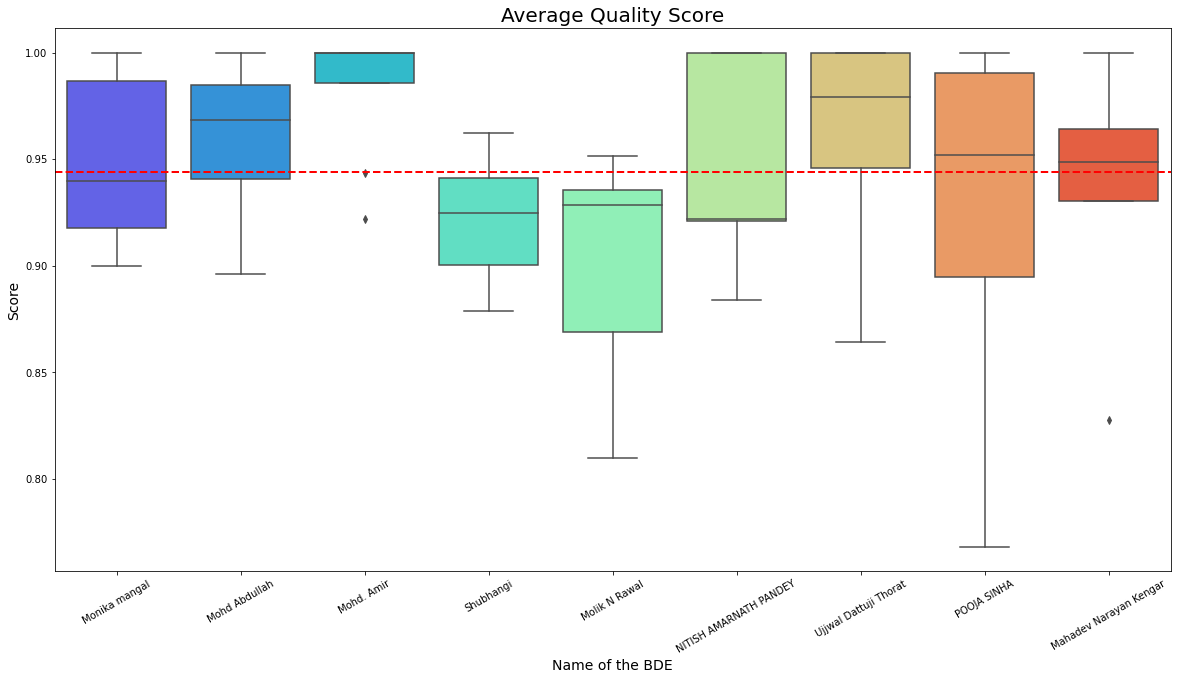

Average Quality Score of the team is - 0.9438109274340768


In [57]:
#Average Quality Score
plt.figure(figsize=(20, 10))
Avg_Score=np.mean(df['Score'])
sns.boxplot(y='Score', x='Name of the BDE', data=df, palette='rainbow')
plt.axhline(Avg_Score, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Average Quality Score', fontsize=20)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
plt.show()

print('Average Quality Score of the team is -', Avg_Score)

In [12]:
#Lead Count Wise Quality Score

print(df['Score'].value_counts())

1.000000    19
0.942308     2
0.921875     2
0.878788     2
0.928571     2
0.951613     1
0.864198     1
0.896104     1
0.937500     1
0.768116     1
0.941860     1
0.964286     1
0.900000     1
0.857143     1
0.911765     1
0.912281     1
0.957447     1
0.968254     1
0.956522     1
0.809524     1
0.884058     1
0.924242     1
0.969697     1
0.921053     1
0.896552     1
0.930233     1
0.880597     1
0.933333     1
0.913043     1
0.958333     1
0.946429     1
0.943662     1
0.827586     1
0.948718     1
0.961538     1
0.962264     1
Name: Score, dtype: int64


Text(0.5, 0, 'Name of the BDE')

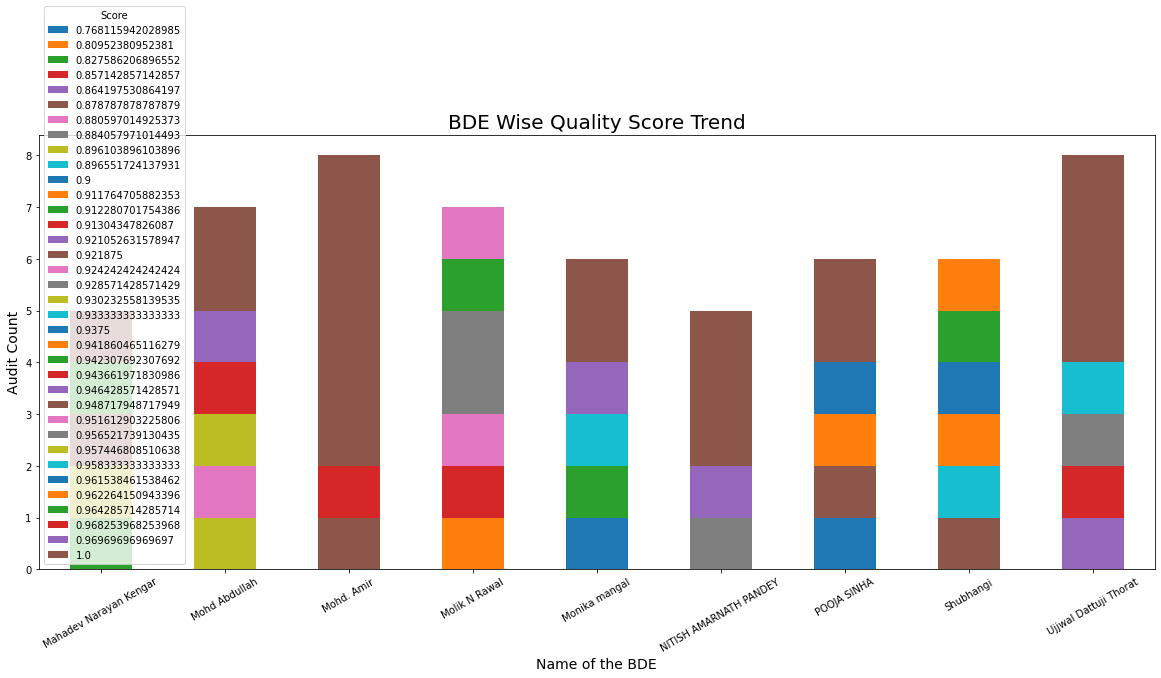

In [13]:
#BDE Wise Quality Score Trend
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
pd.crosstab(df['Name of the BDE'], df['Score']).plot(kind='bar', stacked=True)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Quality Score Trend', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)

Text(0.5, 0, 'Name of the BDE')

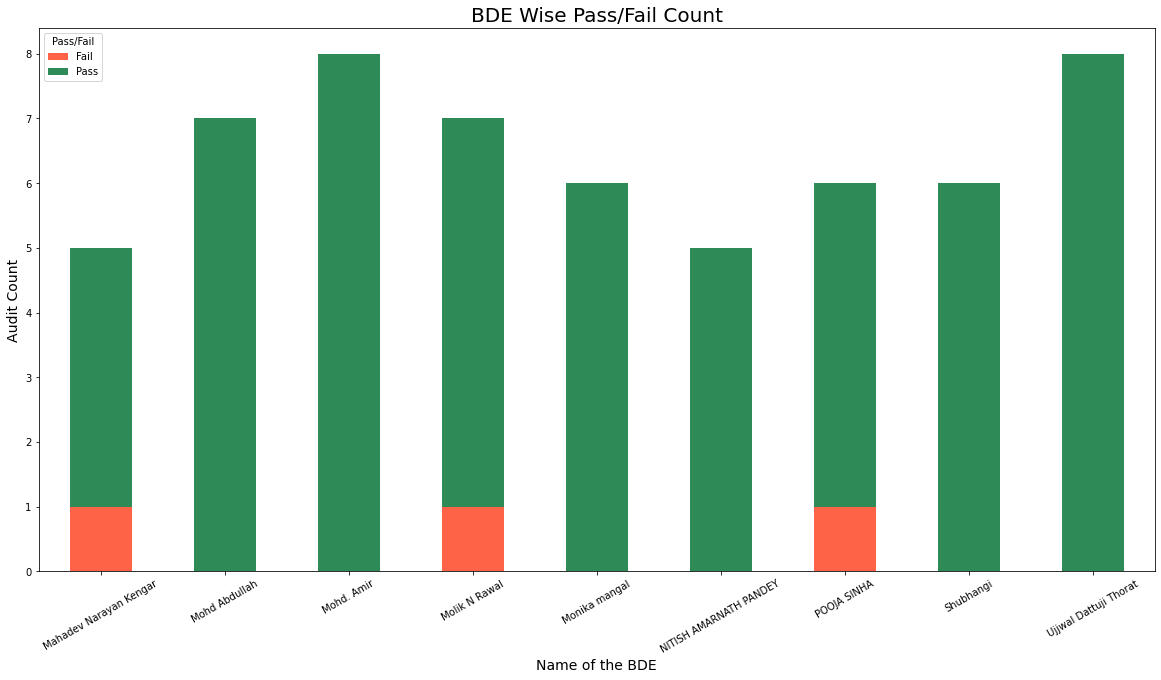

In [14]:
#BDE Wise Pass/Fail Count
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
pd.crosstab(df['Name of the BDE'], df['Pass/Fail']).plot(kind='bar', stacked=True, color =['tomato', 'seagreen'])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Pass/Fail Count', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)

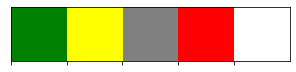

In [60]:
import pandas as pd
import seaborn as sns

color = ["green", "Yellow", "Grey", "Red", "White"]
sns.set_palette(color)
sns.palplot(sns.color_palette())

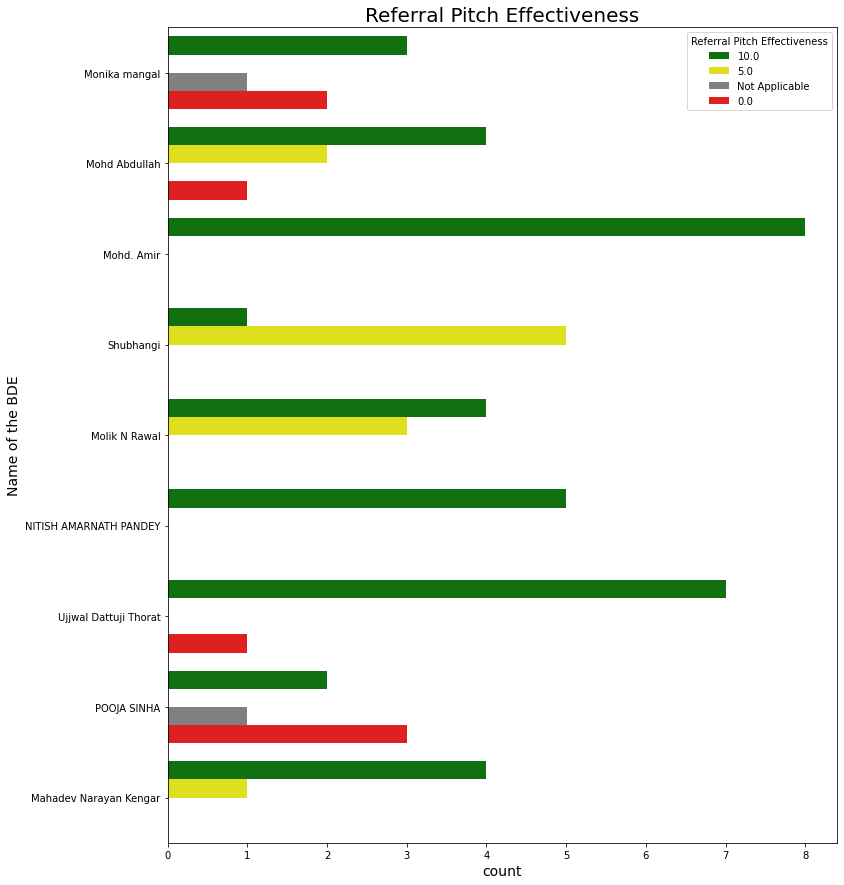

Name of the BDE         Referral Pitch Effectiveness
Mahadev Narayan Kengar  10.0                            4
                        5.0                             1
Mohd Abdullah           10.0                            4
                        5.0                             2
                        0.0                             1
Mohd. Amir              10.0                            8
Molik N Rawal           10.0                            4
                        5.0                             3
Monika mangal           10.0                            3
                        0.0                             2
                        Not Applicable                  1
NITISH AMARNATH PANDEY  10.0                            5
POOJA SINHA             0.0                             3
                        10.0                            2
                        Not Applicable                  1
Shubhangi               5.0                             5
                   

In [61]:
#Referral Pitch Effectiveness
plt.figure(figsize=(12, 15))
plt.title('Referral Pitch Effectiveness', fontsize=20)
plt.ylabel('Name of the BDE', fontsize=14)
plt.xlabel('Lead Count', fontsize=14)
sns.countplot(y ='Name of the BDE', hue = "Referral Pitch Effectiveness", data = df)
plt.show()
print(df.groupby('Name of the BDE')['Referral Pitch Effectiveness'].value_counts())


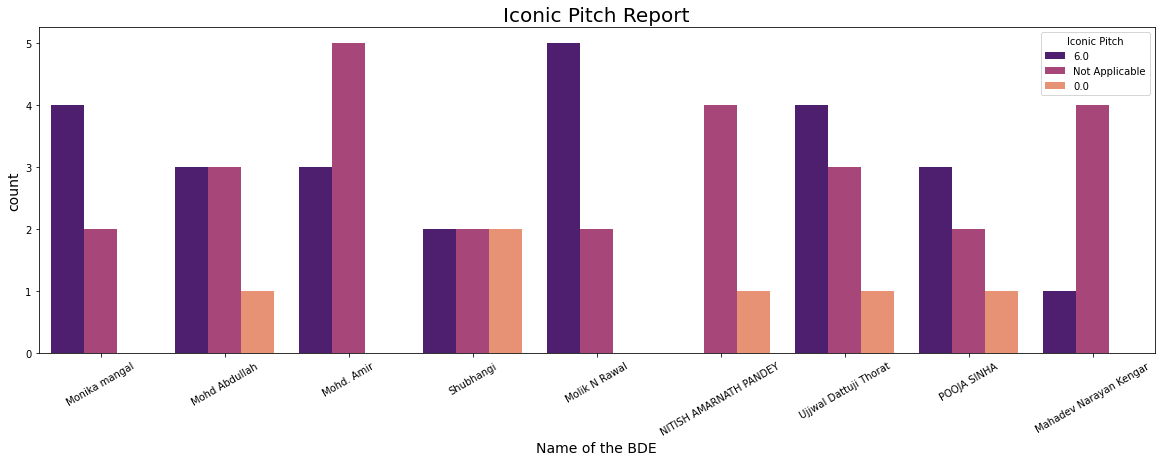

Name of the BDE         Iconic Pitch  
Mahadev Narayan Kengar  Not Applicable    4
                        6.0               1
Mohd Abdullah           6.0               3
                        Not Applicable    3
                        0.0               1
Mohd. Amir              Not Applicable    5
                        6.0               3
Molik N Rawal           6.0               5
                        Not Applicable    2
Monika mangal           6.0               4
                        Not Applicable    2
NITISH AMARNATH PANDEY  Not Applicable    4
                        0.0               1
POOJA SINHA             6.0               3
                        Not Applicable    2
                        0.0               1
Shubhangi               0.0               2
                        6.0               2
                        Not Applicable    2
Ujjwal Dattuji Thorat   6.0               4
                        Not Applicable    3
                        0.0          

In [19]:
#Iconic Pitch Report
plt.figure(figsize=(20, 6))
plt.title('Iconic Pitch Report', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Iconic Pitch", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Iconic Pitch'].value_counts())

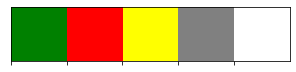

In [34]:
color = ["green", "Red", "Yellow", "Grey", "White"]
sns.set_palette(color)
sns.palplot(sns.color_palette())

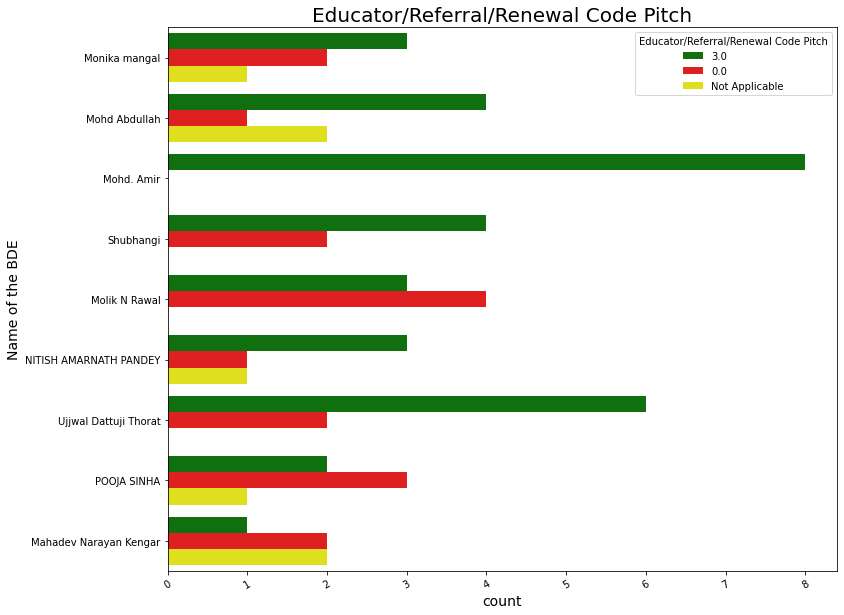

Name of the BDE         Educator/Referral/Renewal Code Pitch
Mahadev Narayan Kengar  0.0                                     2
                        Not Applicable                          2
                        3.0                                     1
Mohd Abdullah           3.0                                     4
                        Not Applicable                          2
                        0.0                                     1
Mohd. Amir              3.0                                     8
Molik N Rawal           0.0                                     4
                        3.0                                     3
Monika mangal           3.0                                     3
                        0.0                                     2
                        Not Applicable                          1
NITISH AMARNATH PANDEY  3.0                                     3
                        0.0                                     1
               

In [45]:
#Educator/Referral/Renewal Code Pitch Pitch

plt.figure(figsize=(12, 10))
plt.title('Educator/Referral/Renewal Code Pitch', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(y ='Name of the BDE', hue = "Educator/Referral/Renewal Code Pitch", data = df)
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Educator/Referral/Renewal Code Pitch'].value_counts())

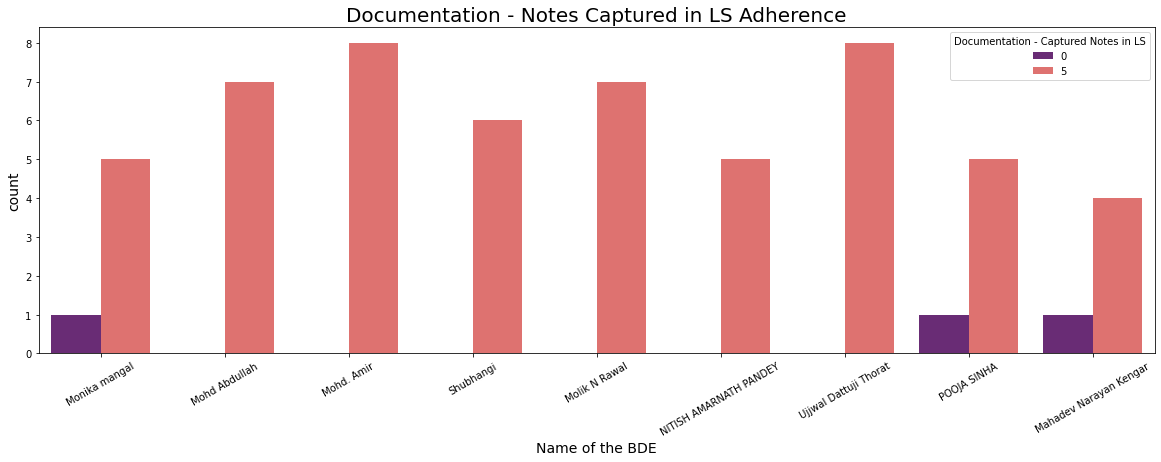

Name of the BDE         Documentation - Captured Notes in LS
Mahadev Narayan Kengar  5                                       4
                        0                                       1
Mohd Abdullah           5                                       7
Mohd. Amir              5                                       8
Molik N Rawal           5                                       7
Monika mangal           5                                       5
                        0                                       1
NITISH AMARNATH PANDEY  5                                       5
POOJA SINHA             5                                       5
                        0                                       1
Shubhangi               5                                       6
Ujjwal Dattuji Thorat   5                                       8
Name: Documentation - Captured Notes in LS, dtype: int64


In [46]:
#Documentation - Notes Captured in LS Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Notes Captured in LS Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Captured Notes in LS", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Captured Notes in LS'].value_counts())

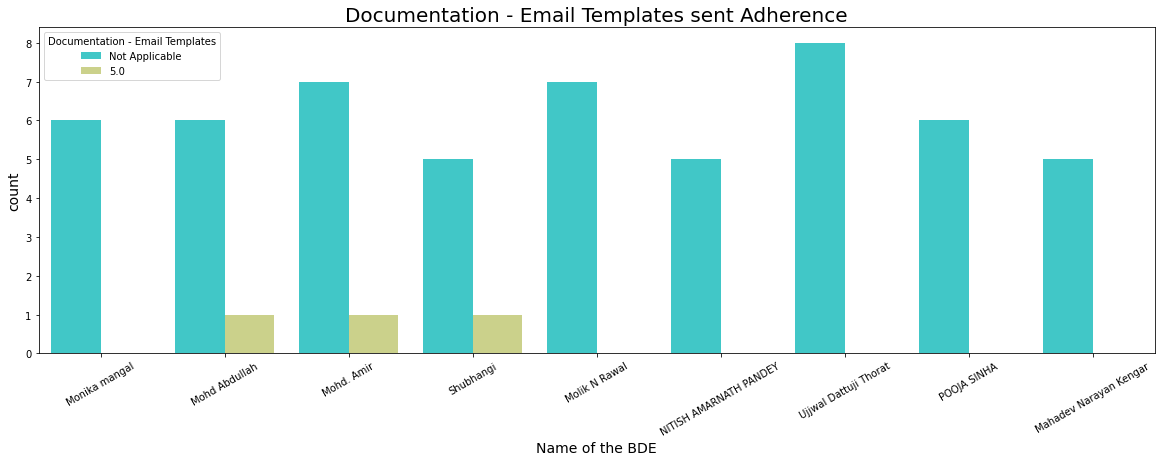

Name of the BDE         Documentation - Email Templates
Mahadev Narayan Kengar  Not Applicable                     5
Mohd Abdullah           Not Applicable                     6
                        5.0                                1
Mohd. Amir              Not Applicable                     7
                        5.0                                1
Molik N Rawal           Not Applicable                     7
Monika mangal           Not Applicable                     6
NITISH AMARNATH PANDEY  Not Applicable                     5
POOJA SINHA             Not Applicable                     6
Shubhangi               Not Applicable                     5
                        5.0                                1
Ujjwal Dattuji Thorat   Not Applicable                     8
Name: Documentation - Email Templates, dtype: int64


In [47]:
#Documentation - Email Templates sent Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Email Templates sent Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Email Templates", data = df, palette='rainbow')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Email Templates'].value_counts())

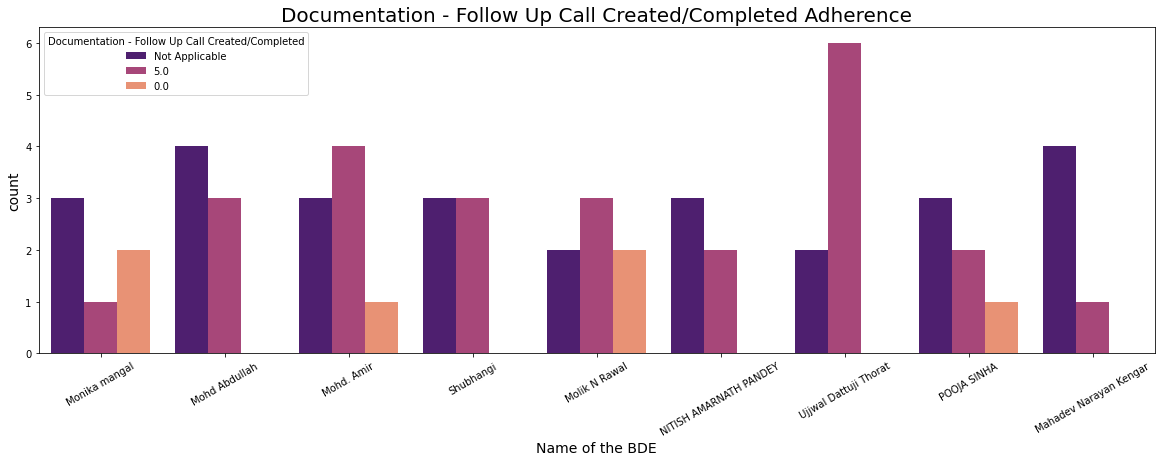

Name of the BDE         Documentation - Follow Up Call Created/Completed
Mahadev Narayan Kengar  Not Applicable                                      4
                        5.0                                                 1
Mohd Abdullah           Not Applicable                                      4
                        5.0                                                 3
Mohd. Amir              5.0                                                 4
                        Not Applicable                                      3
                        0.0                                                 1
Molik N Rawal           5.0                                                 3
                        0.0                                                 2
                        Not Applicable                                      2
Monika mangal           Not Applicable                                      3
                        0.0                                          

In [48]:
#Documentation - Follow Up Call Created/Completed Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Follow Up Call Created/Completed Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Follow Up Call Created/Completed", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Follow Up Call Created/Completed'].value_counts())

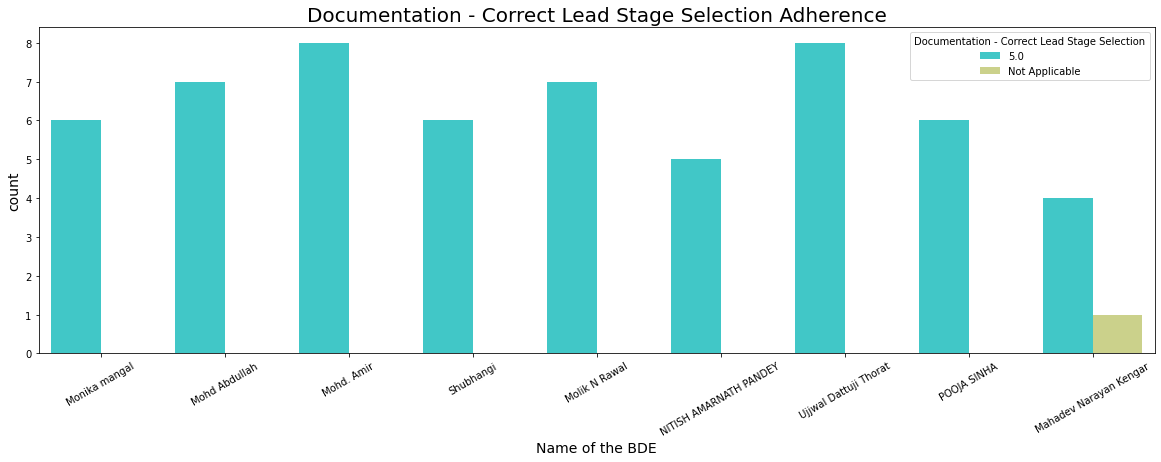

Name of the BDE         Documentation - Correct Lead Stage Selection
Mahadev Narayan Kengar  5.0                                             4
                        Not Applicable                                  1
Mohd Abdullah           5.0                                             7
Mohd. Amir              5.0                                             8
Molik N Rawal           5.0                                             7
Monika mangal           5.0                                             6
NITISH AMARNATH PANDEY  5.0                                             5
POOJA SINHA             5.0                                             6
Shubhangi               5.0                                             6
Ujjwal Dattuji Thorat   5.0                                             8
Name: Documentation - Correct Lead Stage Selection, dtype: int64


In [49]:
#Documentation - Correct Lead Stage Selection Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Correct Lead Stage Selection Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Correct Lead Stage Selection", data = df, palette='rainbow')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Correct Lead Stage Selection'].value_counts())

The End.